<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#What-is-JSON?" data-toc-modified-id="What-is-JSON?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What is JSON?</a></span></li><li><span><a href="#JSON-Format" data-toc-modified-id="JSON-Format-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>JSON Format</a></span></li></ul></li><li><span><a href="#Loading-a-JSON-File" data-toc-modified-id="Loading-a-JSON-File-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading a JSON File</a></span><ul class="toc-item"><li><span><a href="#Exploring-JSON-Schemas" data-toc-modified-id="Exploring-JSON-Schemas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploring JSON Schemas</a></span></li></ul></li><li><span><a href="#Loading-in-Plant-Data" data-toc-modified-id="Loading-in-Plant-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading in Plant Data</a></span><ul class="toc-item"><li><span><a href="#What-Information-Do-We-Have?" data-toc-modified-id="What-Information-Do-We-Have?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>What Information Do We Have?</a></span></li><li><span><a href="#Plant-Families" data-toc-modified-id="Plant-Families-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plant Families</a></span></li><li><span><a href="#Synonyms" data-toc-modified-id="Synonyms-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Synonyms</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Bibliography</a></span></li></ul></li><li><span><a href="#Matching-Author-and-Bibliography" data-toc-modified-id="Matching-Author-and-Bibliography-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Matching Author and Bibliography</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Year" data-toc-modified-id="Year-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Year</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li></ul></div>

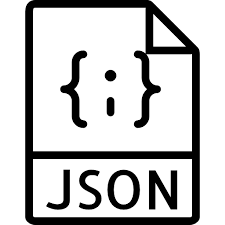

In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict

# Learning Objectives

- Load and explore a .json file in Python
- Create a clean data structure from a .json file
- Conduct descriptive analysis
- Visualize the results

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

```json
{"menu": {
  "id": 12412,
  "istest": true,
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

Can have these types in it (all relatable to Python types):

|JavaScript|JS Example               |Python Equivalent|Python Example           |
|----------|-------------------------|-----------------|-------------------------|
|Objects   |`{'key0':'v12','v':1}`   |Dictionaries     |`{'key0':'v12','v':1}`   |
|Arrays    |`[1, 'one', 'two', 3, 5]`|Lists            |`[1, 'one', 'two', 3, 5]`|
|Strings   |`'One'` or `"Two"`       |Strings          |`'One'` or `"Two"`       |
|Numbers   |`1234.5` or `8675309`    |Numbers          |`1234.5` or `8675309`    |  
|Boolean   |`true` or `false`        |Boolean          |`True` or `False`        |
|Null Value|`null`                   |None Value       |`None`                   |

# Loading a JSON File

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!ls data

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
with open('data/new_releases.json', 'r') as f:
    data = json.load(f)

The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [6]:
## This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

In [7]:
# One way to make it easier to read
print(json.dumps(data, indent=4))

{
    "albums": {
        "href": "https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20",
        "items": [
            {
                "album_type": "album",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i"
                        },
                        "href": "https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i",
                        "id": "1RyvyyTE3xzB2ZywiAwp0i",
                        "name": "Future",
                        "type": "artist",
                        "uri": "spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"
                    }
                ],
                "available_markets": [
                    "AD",
                    "AE",
                    "AR",
                    "AT",
                    "AU",
                    "BE",
                    "BG",
                    "BH",
                 

In [8]:
# Using the default Jupyter Notebook's display() helps
# display(data) # Uncomment this to do the same as just displaying the last line
# data
display(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [9]:
type(data)

dict

In [10]:
data.keys()

dict_keys(['albums'])

In [11]:
data.values()

dict_values([{'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'hre

In [12]:
data.items()

dict_items([('albums', {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6l

In [15]:
data['albums']

{'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
 'items': [{'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
     'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
     'id': '1RyvyyTE3xzB2ZywiAwp0i',
     'name': 'Future',
     'type': 'artist',
     'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
   'available_markets': ['AD',
    'AE',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HU',
    'ID',
    'IE',
    'IL',
    'IN',
    'IS',
    'IT',
    'JO',
    'JP',
    'KW',
    'LB',
    'LI',
    'LT',
    'LU',
    'LV',
    'MA',
    'MC',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'NO',
 

In [16]:
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

At this point, things are starting to look something like this: 

![](../images/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [20]:
for key in data['albums'].keys():
    print(type(data['albums'][key]))

<class 'str'>
<class 'list'>
<class 'int'>
<class 'str'>
<class 'int'>
<class 'NoneType'>
<class 'int'>


Adding this to our diagram, we now have something like this:

![](../images/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [23]:
data['albums']['items']

[{'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
    'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
    'id': '1RyvyyTE3xzB2ZywiAwp0i',
    'name': 'Future',
    'type': 'artist',
    'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
  'available_markets': ['AD',
   'AE',
   'AR',
   'AT',
   'AU',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT',
   'JO',
   'JP',
   'KW',
   'LB',
   'LI',
   'LT',
   'LU',
   'LV',
   'MA',
   'MC',
   'MT',
   'MX',
   'MY',
   'NI',
   'NL',
   'NO',
   'NZ',
   'OM',
   'PA',
   'PE',
   'PH',
   'PL',
   'PS',
   'PT',
   'PY',
   'QA',
   'RO',
   'SA',
   'SE',
   'SG',
   'SK',
   'SV',
   'T

In [24]:
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

In [26]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [27]:
data['albums']['items'][0]['name']

'High Off Life'

In [36]:
data['albums']['items'][2]['artists'][0]['name']

'Various Artists'

We access values as we would for nested lists or dictionaries in Python.

# Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [37]:
with open('data/plants.json', 'r') as f:
    plants = json.load(f)

This dataset was gathered with the [Trefle API](https://docs.trefle.io/). It contains information about 1000 plants in JSON form.

In [38]:
plants

[{'id': 678281,
  'common_name': 'Evergreen oak',
  'slug': 'quercus-rotundifolia',
  'scientific_name': 'Quercus rotundifolia',
  'year': 1785,
  'bibliography': 'Encycl. 1: 723 (1785)',
  'author': 'Lam.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Beech family',
  'genus_id': 5778,
  'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
  'synonyms': ['Quercus lyauteyi',
   'Quercus rotundifolia f. crassicupulata',
   'Quercus ballota',
   'Quercus ilex f. brevicupulata',
   'Quercus calycina',
   'Quercus rotundifolia f. dolichocalyx',
   'Quercus rotundifolia f. pilosella',
   'Quercus rotundifolia f. macrocarpa',
   'Quercus rotundifolia f. calycina',
   'Quercus ilex f. macrocarpa',
   'Quercus ilex subsp. ballota',
   'Quercus rotundifolia var. pilosella',
   'Quercus rotundifolia var. brevicupulata',
   'Quercus rotundifolia subsp. maghrebiana',
   'Quercus rotundifolia f. brevicupulata',
   'Quercus rotundifolia va

In [39]:
type(plants)

list

In [40]:
len(plants)

1000

In [44]:
for x in plants[0].keys():
    print(plants[0][x])

678281
Evergreen oak
quercus-rotundifolia
Quercus rotundifolia
1785
Encycl. 1: 723 (1785)
Lam.
accepted
species
Beech family
5778
https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30
['Quercus lyauteyi', 'Quercus rotundifolia f. crassicupulata', 'Quercus ballota', 'Quercus ilex f. brevicupulata', 'Quercus calycina', 'Quercus rotundifolia f. dolichocalyx', 'Quercus rotundifolia f. pilosella', 'Quercus rotundifolia f. macrocarpa', 'Quercus rotundifolia f. calycina', 'Quercus ilex f. macrocarpa', 'Quercus ilex subsp. ballota', 'Quercus rotundifolia var. pilosella', 'Quercus rotundifolia var. brevicupulata', 'Quercus rotundifolia subsp. maghrebiana', 'Quercus rotundifolia f. brevicupulata', 'Quercus rotundifolia var. macrocarpa']
Quercus
Fagaceae
{'self': '/api/v1/species/quercus-rotundifolia', 'plant': '/api/v1/plants/quercus-rotundifolia', 'genus': '/api/v1/genus/quercus'}


## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [42]:
plants[0].keys()

dict_keys(['id', 'common_name', 'slug', 'scientific_name', 'year', 'bibliography', 'author', 'status', 'rank', 'family_common_name', 'genus_id', 'image_url', 'synonyms', 'genus', 'family', 'links'])

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [45]:
# Create defaultdict
plant_dict = defaultdict(int)

In [46]:
# Fill default dictionary
for plant in plants:
    plant_dict[plant['family_common_name']] += 1

In [47]:
# Check it out!
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [51]:
plant_dict['Palm family']

2

Are there any missing values?

In [52]:
# How to look for missing?
plant_dict[None]

113

Let's remove these by using a dictionary comprehension:

In [66]:
# Dict comp!
fams_cleaned = {fam: num for fam, num in plant_dict.items() if fam!= None}
fams_cleaned

{'Beech family': 10,
 'Nettle family': 2,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Olive family': 5,
 'Rose family': 49,
 'Birch family': 7,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Soapberry family': 7,
 'Pine family': 10,
 'Mint family': 45,
 'Madder family': 9,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Horsetail family': 7,
 'Heath family': 17,
 'Loosestrife family': 2,
 'Bracken Fern family': 1,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Willow family': 3,
 'Polypody family': 7,
 'Dogwood family': 3,
 'Honeysuckle family': 9,
 'Morning-glory family': 3,
 'Iris family': 1,
 'Spleenwort family': 8,
 'Amaranth family': 6,
 'Sedge family': 41,
 'Buckthorn family': 3,
 'Holly family': 1,
 'Potato family': 7,
 'Bellflower family': 9,
 'Wood-Sorrel family': 3,
 'Borage family': 13,
 'Bittersweet family': 2,
 'Primrose family': 12,
 'Poppy family': 7,
 'Spurge family': 10,
 

In [67]:
fams_cleaned.get(None,0)

0

Let's also remove the families whose counts are less than ten:

In [74]:
fams_under_10 = {fam: num for fam, num in plant_dict.items() if num <= 10}
fams_under_10

{'Beech family': 10,
 'Nettle family': 2,
 'Olive family': 5,
 'Birch family': 7,
 'Soapberry family': 7,
 'Pine family': 10,
 'Madder family': 9,
 'Geranium family': 10,
 'Horsetail family': 7,
 'Loosestrife family': 2,
 'Bracken Fern family': 1,
 'Evening Primrose family': 10,
 'Willow family': 3,
 'Polypody family': 7,
 'Dogwood family': 3,
 'Honeysuckle family': 9,
 'Morning-glory family': 3,
 'Iris family': 1,
 'Spleenwort family': 8,
 'Amaranth family': 6,
 'Buckthorn family': 3,
 'Holly family': 1,
 'Potato family': 7,
 'Bellflower family': 9,
 'Wood-Sorrel family': 3,
 'Bittersweet family': 2,
 'Poppy family': 7,
 'Spurge family': 10,
 'Cat-tail family': 4,
 'Arum family': 8,
 'Water-plantain family': 1,
 'Hemp family': 1,
 'Sumac family': 2,
 'Touch-me-not family': 3,
 'Broom-rape family': 10,
 'Elm family': 2,
 'Flax family': 2,
 'Stonecrop family': 8,
 'Brachythecium moss family': 3,
 'Rock-rose family': 5,
 'Mallow family': 5,
 'Buckbean family': 1,
 'Sundew family': 2,
 'M

Now we can make a bar chart of the numbers:

In [75]:
fams_cleaned

{'Beech family': 10,
 'Nettle family': 2,
 'Grass family': 81,
 'Plantain family': 25,
 'Buttercup family': 21,
 'Pea family': 63,
 'Olive family': 5,
 'Rose family': 49,
 'Birch family': 7,
 'Rush family': 19,
 'Buckwheat family': 17,
 'Soapberry family': 7,
 'Pine family': 10,
 'Mint family': 45,
 'Madder family': 9,
 'Pink family': 31,
 'Carrot family': 29,
 'Geranium family': 10,
 'Aster family': 80,
 'Horsetail family': 7,
 'Heath family': 17,
 'Loosestrife family': 2,
 'Bracken Fern family': 1,
 'Mustard family': 29,
 'Evening Primrose family': 10,
 'Willow family': 3,
 'Polypody family': 7,
 'Dogwood family': 3,
 'Honeysuckle family': 9,
 'Morning-glory family': 3,
 'Iris family': 1,
 'Spleenwort family': 8,
 'Amaranth family': 6,
 'Sedge family': 41,
 'Buckthorn family': 3,
 'Holly family': 1,
 'Potato family': 7,
 'Bellflower family': 9,
 'Wood-Sorrel family': 3,
 'Borage family': 13,
 'Bittersweet family': 2,
 'Primrose family': 12,
 'Poppy family': 7,
 'Spurge family': 10,
 

In [76]:
plt.style.use('seaborn')

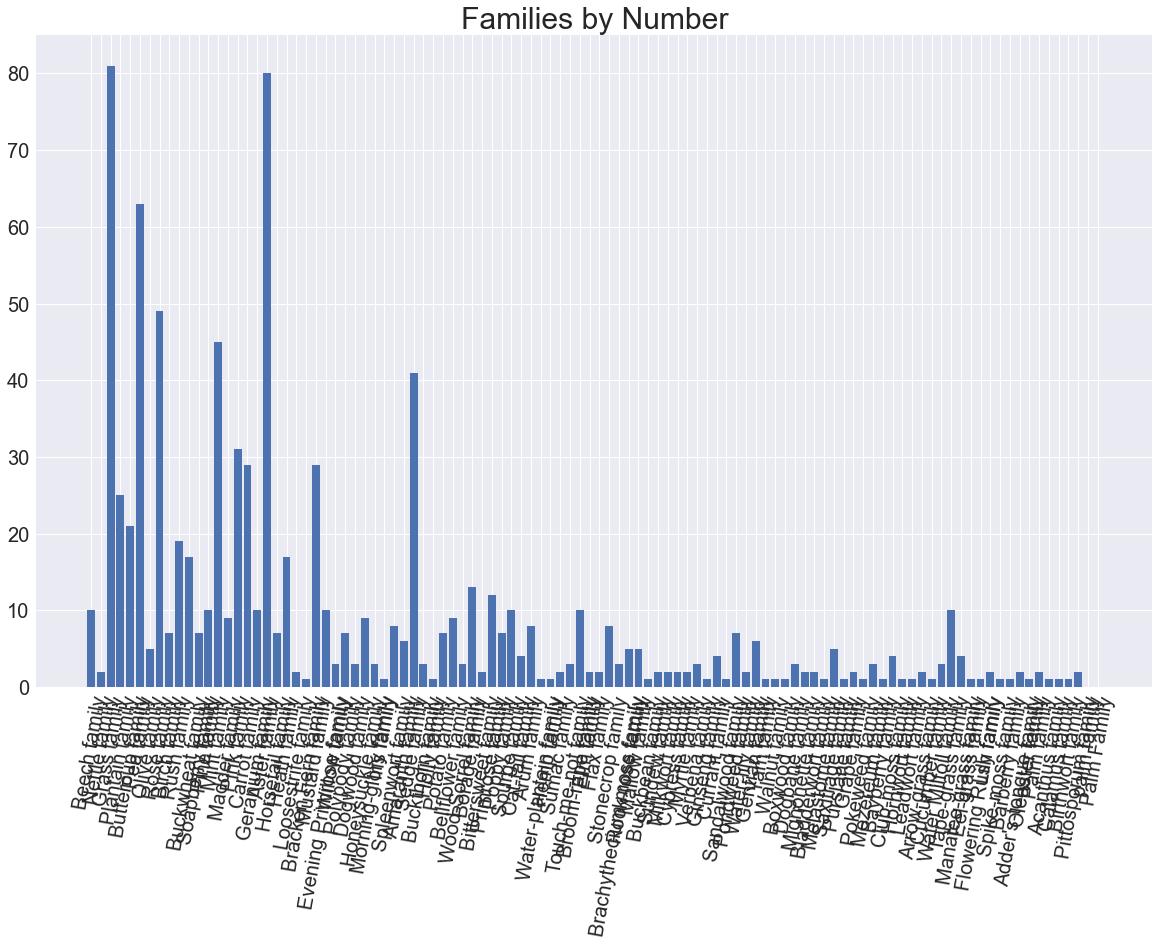

In [78]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(x=list(fams_cleaned.keys()), height=list(fams_cleaned.values()))
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

## Synonyms

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [79]:
num_syn = [len(plant['synonyms']) for plant in plants]

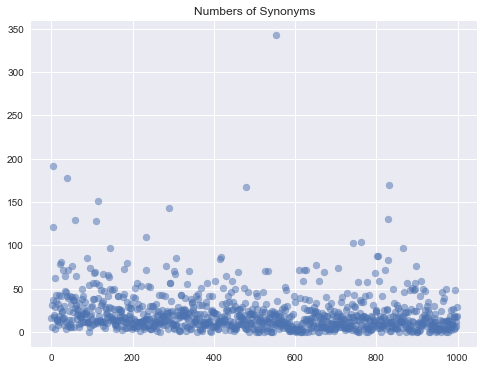

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x = range(1000), y = num_syn, alpha=0.5)
ax.set_title('Numbers of Synonyms');

## Exercise

One plant has nearly 350 synonynms! What plant is this?

In [85]:
plants

[{'id': 678281,
  'common_name': 'Evergreen oak',
  'slug': 'quercus-rotundifolia',
  'scientific_name': 'Quercus rotundifolia',
  'year': 1785,
  'bibliography': 'Encycl. 1: 723 (1785)',
  'author': 'Lam.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Beech family',
  'genus_id': 5778,
  'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
  'synonyms': ['Quercus lyauteyi',
   'Quercus rotundifolia f. crassicupulata',
   'Quercus ballota',
   'Quercus ilex f. brevicupulata',
   'Quercus calycina',
   'Quercus rotundifolia f. dolichocalyx',
   'Quercus rotundifolia f. pilosella',
   'Quercus rotundifolia f. macrocarpa',
   'Quercus rotundifolia f. calycina',
   'Quercus ilex f. macrocarpa',
   'Quercus ilex subsp. ballota',
   'Quercus rotundifolia var. pilosella',
   'Quercus rotundifolia var. brevicupulata',
   'Quercus rotundifolia subsp. maghrebiana',
   'Quercus rotundifolia f. brevicupulata',
   'Quercus rotundifolia va

In [89]:
for plant in plants:
    if len(plant['synonyms']) > 340:
        print(plant['common_name'])

Irish potato


In [91]:
[plant for plant in plants if len(plant['synonyms']) > 300][0]['common_name']

'Irish potato'

## Bibliography

In [95]:
# Create a list with the bibliographies
bibliographies = [plant['bibliography'] for plant in plants]
bibliographies

['Encycl. 1: 723 (1785)',
 'Sp. Pl.: 984 (1753)',
 'Sp. Pl.: 71 (1753)',
 'Sp. Pl.: 113 (1753)',
 'Sp. Pl.: 996 (1753)',
 'Sp. pl. 1:74.  1753',
 'Sp. Pl.: 554 (1753)',
 'Sp. Pl.: 1048 (1753)',
 'Sp. Pl.: 767 (1753)',
 'Sp. Pl.: 1057 (1753)',
 'Fl. Austriac. 3: 50 (1775)',
 'Sp. Pl.: 768 (1753)',
 'Sp. Pl.: 554 (1753)',
 'Sp. Pl.: 998 (1753)',
 'Sp. Pl.: 998 (1753)',
 'Sp. Pl.: 326 (1753)',
 'Sp. pl. 1:337.  1753, nom. cons.',
 'Sp. Pl.: 28 (1753)',
 'Trudy Imp. S.-Peterburgsk. Bot. Sada 6: 251 (1879)',
 'Sp. pl. 2:1054.  1753',
 'Sp. Pl.: 112 (1753)',
 'Nomencl. Bot., ed. 2, 2: 324 (1841)',
 'Sp. Pl.: 1000 (1753)',
 'Sp. pl. 2:775.  1753',
 'Sp. Pl.: 67 (1753)',
 'Sp. Pl.: 578 (1753)',
 'Sp. Pl.: 477 (1753)',
 'Sp. Pl.: 108 (1753)',
 'Sp. Pl.: 269 (1753)',
 'Sp. Pl.: 85 (1753)',
 'Enum. Stirp. Transsilv. 1: 425 (1816)',
 'Fruct. Sem. Pl. 2: 54 (1790)',
 'Sp. pl. 1:83.  1753',
 'Tent. Fl. Germ. 1: 405 (1788)',
 'Sp. Pl.: 249 (1753)',
 'Sp. Pl.: 681 (1753)',
 'Fl. Excurs. Hafn.: 32 (183

Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [99]:
# Get rid of the nulls (None)
bibs_without_null = [bibs for bibs in bibliographies if bibs != None]

In [100]:
# How many did we lose?
len(bibs_without_null)

994

In [101]:
len(bibliographies)

1000

In [102]:
len(bibliographies) - len(bibs_without_null)

6

In [107]:
# Get a list of all those with Linnaeus
[bib['bibliography'] for bib in bibliographies if "Linnaeus" in bib['bibliography']]

TypeError: string indices must be integers

# Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [113]:
# For loop!
sps = []

for plant in plants:
    if plant['bibliography'].startswith('Sp. Pl.'):
        sps.append(plant)

AttributeError: 'NoneType' object has no attribute 'startswith'

In [114]:
list(set(sp_authors))

NameError: name 'sp_authors' is not defined

In [ ]:
# list comp?


In [ ]:
# Get a list of the authors


In [ ]:
# Make it unique!


In [ ]:
# Get a list of the counts of each author (hint: .count())


In [115]:
# zip it with unique authors and check it out
dict(zip(unique_author), counts)

NameError: name 'unique_author' is not defined

## Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records in ```plants```. Remember, all these records start with 'Sp. Pl.'

In [120]:
for plant in plants:
    try:
        if plant['bibliography'].startswith("Sp. Pl."):
            plant['author'] == "L."
    except:
        continue

In [121]:
for plant in plants:
        if plant['bibliography'].startswith("Sp. Pl."):
            print(plant['author'])

L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.
L.


AttributeError: 'NoneType' object has no attribute 'startswith'

# Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

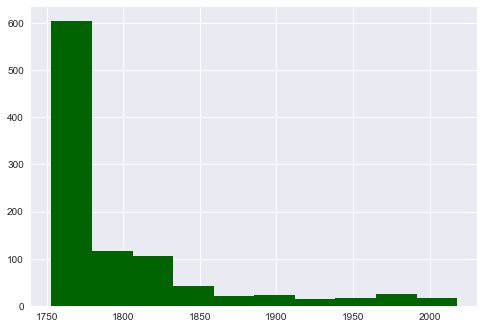

In [122]:
plants_df = pd.DataFrame(plants)

fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

## Exercise

How many plants have first been written about just in the last 20 years? 

In [124]:
last_20 = len(plants_df[plants_df['year'] > 2003])
last_20

10

In [125]:
plants_df[plants_df['year'] > 2003]

id            common_name                              slug  \
45    120923           Bull thistle                   cirsium-vulgare   
154   104781      Scarlet pimpernel               lysimachia-arvensis   
424  1020466      Arctic starflower               lysimachia-europaea   
433  1053374            Checkertree             torminalis-glaberrima   
487   433353                   None  jacobaea-vulgaris-subsp-vulgaris   
533   312247     Manyseed goosefoot               lipandra-polysperma   
565   139670         Black saltwort               lysimachia-maritima   
620   163574          Indian millet               cenchrus-americanus   
767   965522                   None            helictochloa-pratensis   
905   401726  Willowleaf yellowhead               pentanema-salicinum   

            scientific_name    year  \
45          Cirsium vulgare  2006.0   
154     Lysimachia arvensis  2009.0   
424     Lysimachia europaea  2009.0   
433   Torminalis glaberrima  2017.0   
487       Jacobaea vulgaris  2014.0   
533     Lipandra polysperma  2012.0   
565     Lysimachia maritima  2005.0   
620     Cenchrus americanus  2010.0   
767  Helictochloa pratensis  2011.0   
905     Pentanema salicinum  2018.0   

                                          bibliography  \
45                                   Fl. Napol. 5: 209   
154                          Willdenowia 39: 51 (2009)   
424                          Willdenowia 39: 51 (2009)   
433       Memoranda Soc. Fauna Fl. Fenn. 93: 32 (2017)   
487                Pl. Syst. Evol. 301(5): 1538 (2014)   
533                          Willdenowia 42: 14 (2012)   
565  Atti Soc. Ital. Sci. Nat. Mus. Civico Storia N...   
620                 Ann. Bot. (Oxford) 106: 127 (2010)   
767                           Candollea 66: 103 (2011)   
905                            Taxon 67(1): 159 (2018)   

                                                author    status     rank  \
45                                         (Savi) Ten.  accepted  species   
154                             (L.) U.Manns & Anderb.  accepted  species   
424                             (L.) U.Manns & Anderb.  accepted  species   
433                          Sennikov & Kurtto (Gand.)  accepted  species   
487                                              Gouan  accepted  species   
533                    (L.) S.Fuentes, Uotila & Borsch  accepted  species   
565                      (L.) Galasso, Banfi & Soldano  accepted  species   
620                                       (L.) Morrone  accepted  species   
767                                  (L.) Romero Zarco  accepted  species   
905  (L.) D.Gut.Larr., Santos-Vicente, Anderb., E.R...  accepted  species   

    family_common_name  genus_id  \
45        Aster family      1787   
154    Primrose family       394   
424    Primrose family       394   
433        Rose family     16714   
487       Aster family      6151   
533    Amaranth family     10295   
565    Primrose family       394   
620       Grass family      1568   
767       Grass family     15954   
905       Aster family      9399   

                                             image_url  \
45   https://bs.plantnet.org/image/o/8d152c039c4272...   
154  https://bs.plantnet.org/image/o/0ac68b930fe19b...   
424  https://bs.plantnet.org/image/o/d183e5579ac8bd...   
433  https://bs.plantnet.org/image/o/6e494eac6cbbff...   
487                                               None   
533  https://bs.plantnet.org/image/o/f790b7119917bc...   
565  https://bs.plantnet.org/image/o/8ac343e72efcce...   
620  https://bs.plantnet.org/image/o/4552f3f918fab5...   
767                                               None   
905  https://bs.plantnet.org/image/o/a3c151772a5f38...   

                                              synonyms         genus  \
45   [Carduus vulgaris, Epitrachys vulgaris, Sonchu...       Cirsium   
154  [Anagallis arvensis, Anagallis arvensis f. pur...    Lysimachia   
424  [Trientalis europaea, Trientalis